# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 5: Time-stepping methods (numerical solution of IVPs) 1 <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem" data-toc-modified-id="Homework---Stability-of-forward-Euler-applied-to-the-MSD-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Stability of forward Euler applied to the MSD problem</a></span></li><li><span><a href="#Homework---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Homework---Implement-improved-Euler-and-compare-with-forward-Euler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Implement improved Euler and compare with forward Euler</a></span></li><li><span><a href="#Homework---Lorenz-system" data-toc-modified-id="Homework---Lorenz-system-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Lorenz system</a></span></li><li><span><a href="#Homework---Circular-orbits-[$\star$]" data-toc-modified-id="Homework---Circular-orbits-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Circular orbits [$\star$]</a></span></li><li><span><a href="#Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]" data-toc-modified-id="Homework---Planetary-motion-(the-two-body-problem-or-Kepler's-problem)--[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]</a></span></li><li><span><a href="#Homework---A-ballistics-example-(the-shooting-method)--[$\star\star$]" data-toc-modified-id="Homework---A-ballistics-example-(the-shooting-method)--[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - A ballistics example (the shooting method)  [$\star\star$]</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Stability of forward Euler applied to the MSD problem

Implement a forward Euler time-stepping function.

Hint:  your solution might look something like (you need to fill in some gaps):

```Python
def forward_euler(f, u0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = ........
        u_all.append(u)
        t = ........
        t_all.append(t)
    return np.array(u_all), np.array(t_all)
```


Run the forward Euler method on the MSD problem from class with the physical and numerical parameters considered in our stability analysis and plots in section 9.2, and plot the solutions obtained, confirming whether you see stability or instability behaviour which is consistent with our plots from the lecture which showed red dots wither being inside or outside the stability region.

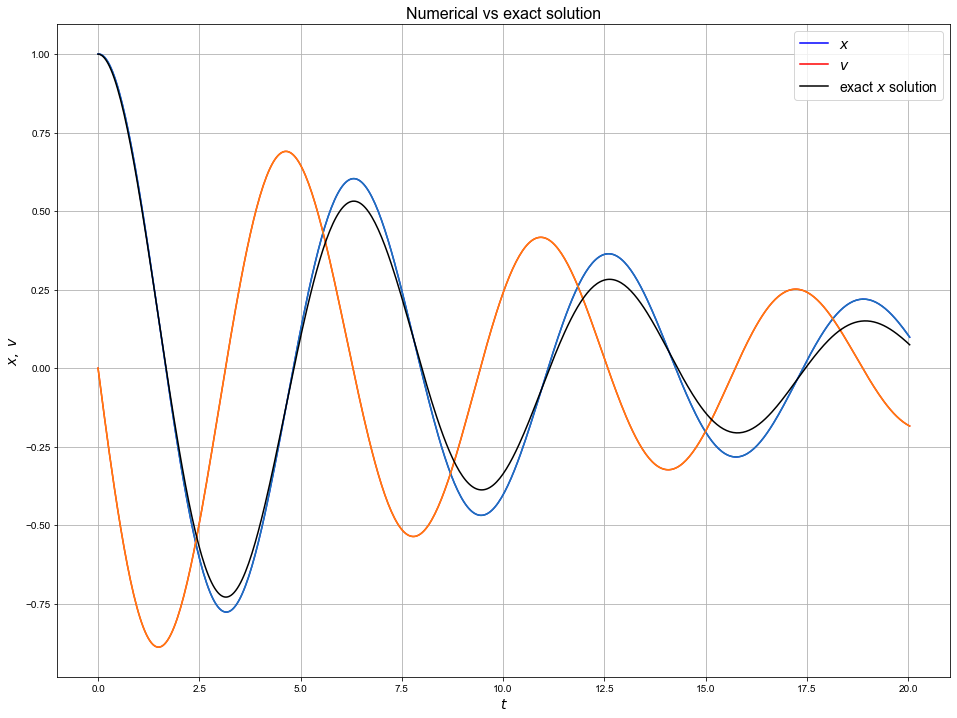

In [10]:
def forward_euler(f, u0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + f(zeta, omega, u) * dt
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def f(zeta, omega, y):
    
    A = np.array([[0,1],[-omega**2, -2*zeta*omega]])
    
    return A @ y

zeta = 0.1
omega = 1
x0 = 1
v0 = 0

u0 = np.array([x0, v0])
t0 =0
t_max = 20
dt = 0.04

u_all, t_all = forward_euler(f, u0, t0, t_max, dt)

x_all = u_all[:,0]
v_all = u_all[:,1]

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(111)
ax1.plot(t_all, x_all, 'b', label='$x$')
ax1.plot(t_all, v_all, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)
plt.plot(t_all, u_all)

om0 = omega
def x_exact(t):
    # the exact solution to the x component of the problem
    om = om0 * np.sqrt(1-zeta**2)
    x_exact = (np.exp(-zeta*om0*t)*(x0*np.cos(om*t) +
                                    (zeta*x0+v0/om0)*((om0/om)**2)*np.sin(om*t)))
    
    return x_exact


ax1.plot(t_all, x_exact(t_all), 'k', label='exact $x$ solution')
# note we could easily compute and plot the exact v solution as well, 
# we don't just so the plot doesn't get too "busy"
ax1.legend(loc='best', fontsize=14);

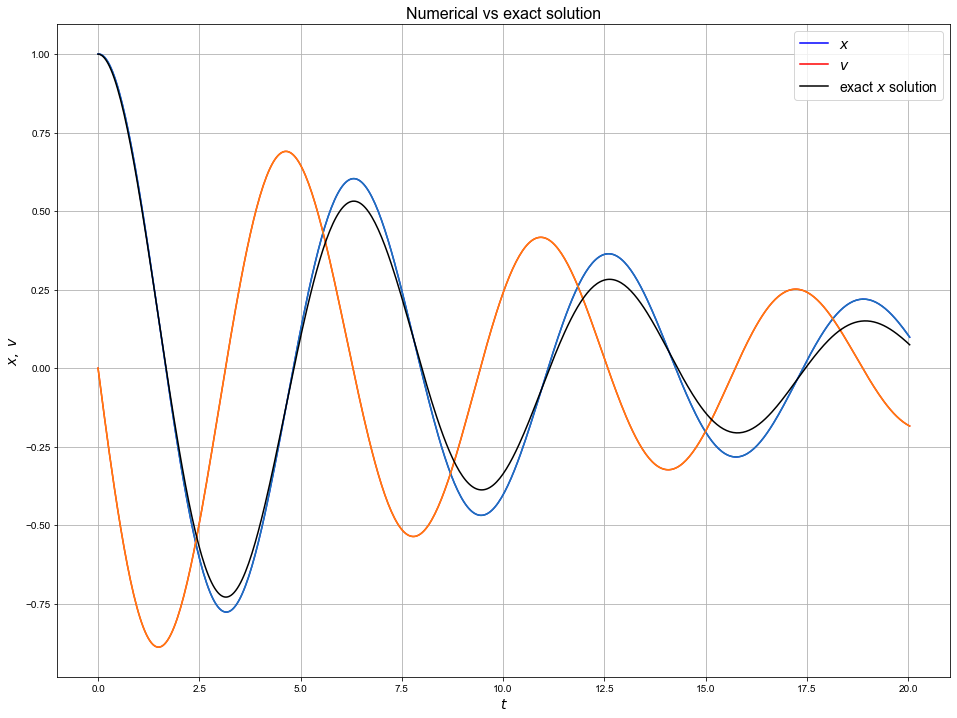

In [11]:
zeta = 0.1
omega = 1
x0 = 1
v0 = 0

u0 = np.array([x0, v0])
t0 =0
t_max = 20
dt = 0.04

u_all, t_all = forward_euler(f, u0, t0, t_max, dt)

x_all = u_all[:,0]
v_all = u_all[:,1]

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(111)
ax1.plot(t_all, x_all, 'b', label='$x$')
ax1.plot(t_all, v_all, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)
plt.plot(t_all, u_all)

om0 = omega
def x_exact(t):
    # the exact solution to the x component of the problem
    om = om0 * np.sqrt(1-zeta**2)
    x_exact = (np.exp(-zeta*om0*t)*(x0*np.cos(om*t) +
                                    (zeta*x0+v0/om0)*((om0/om)**2)*np.sin(om*t)))
    
    return x_exact


ax1.plot(t_all, x_exact(t_all), 'k', label='exact $x$ solution')
# note we could easily compute and plot the exact v solution as well, 
# we don't just so the plot doesn't get too "busy"
ax1.legend(loc='best', fontsize=14);

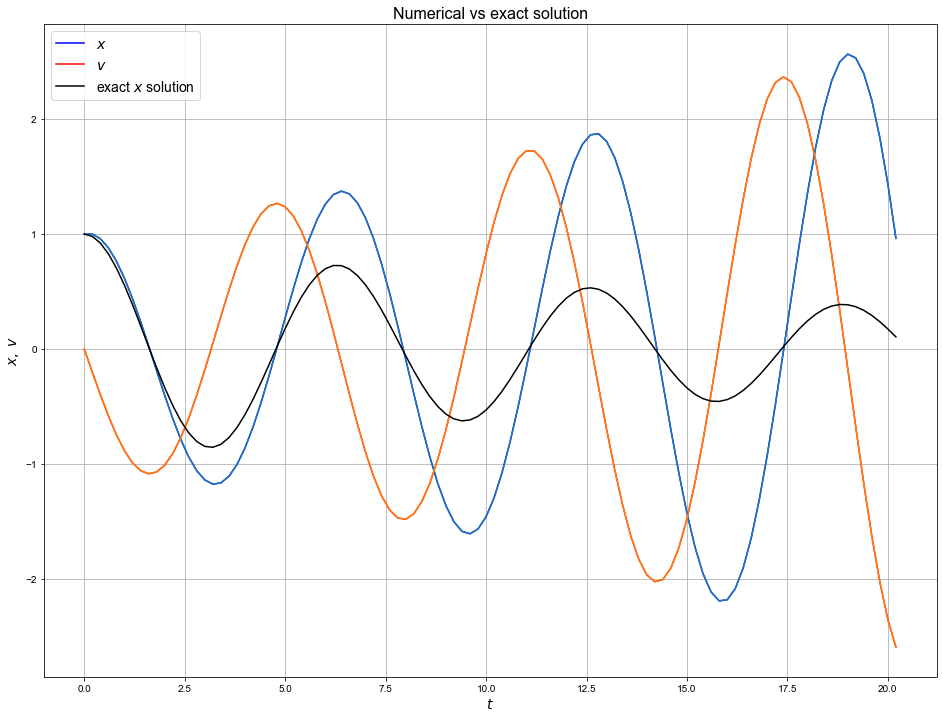

In [12]:
zeta = 0.05
omega = 1
x0 = 1
v0 = 0

u0 = np.array([x0, v0])
t0 =0
t_max = 20
dt = 0.2

u_all, t_all = forward_euler(f, u0, t0, t_max, dt)

x_all = u_all[:,0]
v_all = u_all[:,1]

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(111)
ax1.plot(t_all, x_all, 'b', label='$x$')
ax1.plot(t_all, v_all, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)
plt.plot(t_all, u_all)

om0 = omega
def x_exact(t):
    # the exact solution to the x component of the problem
    om = om0 * np.sqrt(1-zeta**2)
    x_exact = (np.exp(-zeta*om0*t)*(x0*np.cos(om*t) +
                                    (zeta*x0+v0/om0)*((om0/om)**2)*np.sin(om*t)))
    
    return x_exact


ax1.plot(t_all, x_exact(t_all), 'k', label='exact $x$ solution')
# note we could easily compute and plot the exact v solution as well, 
# we don't just so the plot doesn't get too "busy"
ax1.legend(loc='best', fontsize=14);

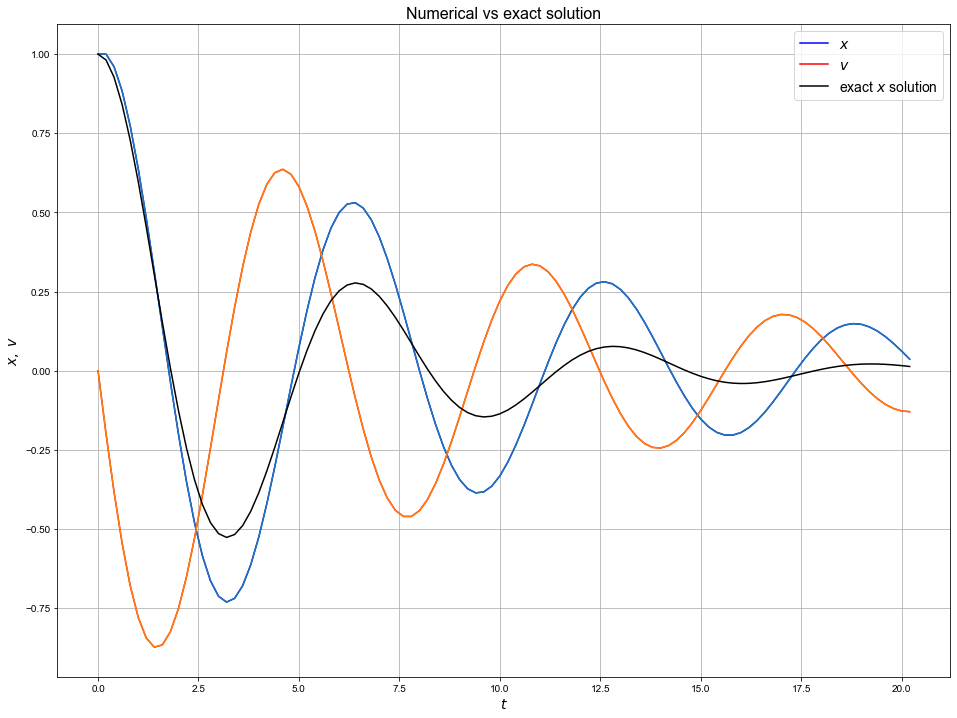

In [13]:
zeta = 0.2
omega = 1
x0 = 1
v0 = 0

u0 = np.array([x0, v0])
t0 =0
t_max = 20
dt = 0.2

u_all, t_all = forward_euler(f, u0, t0, t_max, dt)

x_all = u_all[:,0]
v_all = u_all[:,1]

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(111)
ax1.plot(t_all, x_all, 'b', label='$x$')
ax1.plot(t_all, v_all, 'r', label='$v$')
ax1.set_xlabel(r'$t$', fontsize=14)
ax1.set_ylabel(r'$x,\; v$', fontsize=14)
ax1.set_title('Numerical vs exact solution', fontsize=16)
ax1.grid(True)
plt.plot(t_all, u_all)

om0 = omega
def x_exact(t):
    # the exact solution to the x component of the problem
    om = om0 * np.sqrt(1-zeta**2)
    x_exact = (np.exp(-zeta*om0*t)*(x0*np.cos(om*t) +
                                    (zeta*x0+v0/om0)*((om0/om)**2)*np.sin(om*t)))
    
    return x_exact


ax1.plot(t_all, x_exact(t_all), 'k', label='exact $x$ solution')
# note we could easily compute and plot the exact v solution as well, 
# we don't just so the plot doesn't get too "busy"
ax1.legend(loc='best', fontsize=14);

## Homework - Implement improved Euler and compare with forward Euler

Consider the simple scalar equation

$$u'(t)=u,\;\;\; u(0)=1\,.$$

Implement the forward Euler and improved Euler schemes and use them to approximate solutions of this equation for different values of $\Delta t$. Plot the solutions over the time interval $[0, 2\pi]$.

Write a function `approx_error(f, u0, t0, t, h)` that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $\Delta t$ from $1$ to $10^{-5}$, and plot it against $\Delta t$ in logarithmic scale.

Use `numpy.polyfit` to compute a line of best fit to the logs of the data and hence conclude the order of accuracy of both methods.

You should observe that improved Euler is much better than forward Euler - plot the error as a function of time (suggest you use a semilogy in matplotlib to get a log axis on the $y$ axis, but plot the $x$ (time) axis normally. 

See if you can get [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) working for this problem and see how its errors compare as a function of time - hint: take note of the order that odeint assumes the function $f$ takes the arguments $t$ and $y$, you can pass the argument `tfirst=True` to tell it to assume an order consistent with what convention we assume.

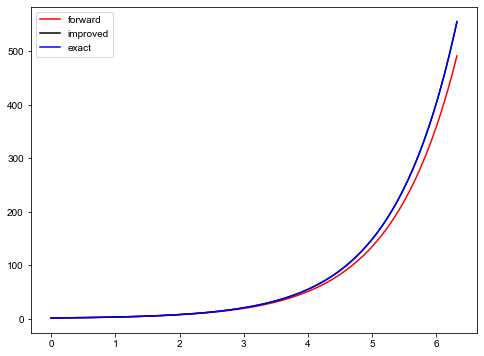

In [53]:
def f(y):
    return y

def forward_euler(f, u0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + f(u) * dt
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    u_star = 0
    
    while t < t_max:
        u_star = u + dt * f(u)
        u = u + 0.5 * dt * (f(u)+f(u_star))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)


def f_exact(t):
    return np.exp(t)

def appro_error(f_exact, u0, t0, t, h):
    exact = f_exact(t)
    
    return f_exact(t) - (f_exact(t+h)-f_exact(t)) / h
    

u0 = 1
t0 = 0
t_max = 2 * np.pi
dt = 0.04
u_all, t_all = forward_euler(f, u0, t0, t_max, dt)

fig = plt.figure(figsize=(8,6))
plt.plot(t_all, u_all, 'r', label='forward')

u_all, t_all = improved_euler(f, u0, t0, t_max, dt)
plt.plot(t_all, u_all, 'black', label='improved')

plt.plot(t_all, np.exp(t_all),'blue', label='exact')
plt.legend()

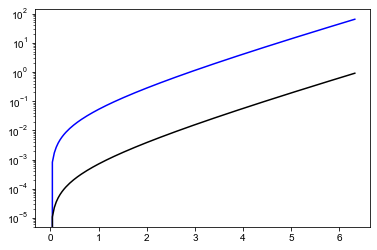

In [57]:
def approx_error():
    u_all, _ =  forward_euler(f, u0, t0, t_max, dt)
    error_forward = np.abs(f_exact(t_all) - u_all)
    
    u_all, _ = improved_euler(f, u0, t0, t_max, dt)
    error_improved = np.abs(f_exact(t_all) - u_all)
    
    return error_forward, error_improved

error_forward, error_improved = approx_error()

plt.semilogy(t_all, error_forward , 'blue')
plt.semilogy(t_all, error_improved, 'black')

## Homework - Lorenz system

Recall the image at the beginning of the lecture.

The [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system "Lorenz system") comprises three coupled ODEs:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x), \\[5pt]
\frac{dy}{dt} &= x(\rho - z) - y, \\[5pt]
\frac{dz}{dt} &= x  y - \beta  z,
\end{align*}

where typical values of the parameters (for a chaotic solution) are $\rho = 28, \, \sigma = 10, \, \beta = 8/3$.

Use forward Euler and improved Euler solvers to plot a solution trajectory - do you see qualitative differences between your trajectories with the two solvers.

To check your answer (after you have attempted it please!), see [https://matplotlib.org/examples/mplot3d/lorenz_attractor.html](https://matplotlib.org/examples/mplot3d/lorenz_attractor.html).

See also [https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation](https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation) for a solution that uses scipy's odeint function. 


Now use your forward Euler and improved Euler solvers to compute and plot the growth in 'error' as a function of time, where here we are defining 'error' to be the difference compared to a solution obtained with `odeint`. 



In [90]:
def forward_euler(f, u0, t0, t_max, dt):
    
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + f(u) * dt
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def improved_euler(f, u0, t0, t_max, dt):
    
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    u_star = 0
    
    while t < t_max:
        u_star = u + dt * f(u)
        u = u + 0.5 * dt * (f(u)+f(u_star))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)

def f(state):
    
    f = np.zeros_like(state)
    x, y, z = state
    f[0] = cita * (y - x)
    f[1] = x * (ro - z) - y
    f[2] = x * y - beta * z
    
    return f

Text(0.5, 0.92, 'Lorenz Attractor')

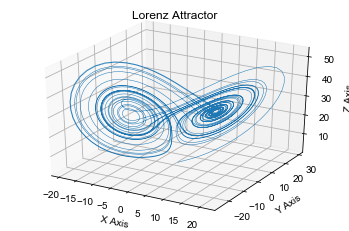

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

ro = 28.
cita = 10.
beta = 8. / 3.

state0 = (1., 1., 1.)

t_max = 39.99
dt = 0.01

u_all,t_all = forward_euler(f, state0, t0, t_max, dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(u_all[:,0], u_all[:,1], u_all[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

Text(0.5, 0.92, 'Lorenz Attractor')

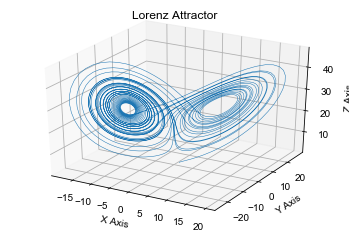

In [101]:
u_all_improved, t_all = improved_euler(f, state0, t0, t_max, dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(u_all_improved[:,0], u_all_improved[:,1], u_all_improved[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

Text(0.5, 0.92, 'Lorenz Attractor')

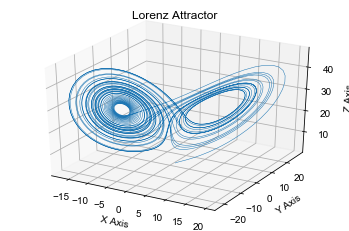

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f_obe(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f_obe, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(states[:,0], states[:,1], states[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

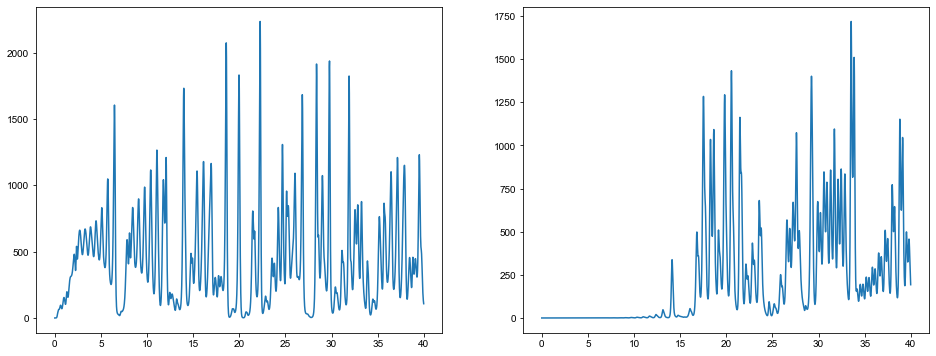

In [108]:
error_forward = []
error_improved = []
for i in range(len(t_all-2)):
    error1 = (u_all[i,0] - states[i,0])**2 + (u_all[i,1] - states[i,1])**2 + (u_all[i,2] - states[i,2])**2
    error2 = (u_all_improved[i,0] - states[i,0])**2 + (u_all_improved[i,1] - states[i,1])**2 + (u_all_improved[i,2] - states[i,2])**2

    error_forward.append(error1)
    error_improved.append(error2)
    
fig, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].plot(t_all, error_forward)
ax[1].plot(t_all, error_improved)


In [96]:
states.shape

(4000, 3)

## Homework - Circular orbits [$\star$]

Consider the coupled problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x,
\end{align*} 

with initial conditions 

$$ x(0)=1,\;\;\;\; y(0)=0. $$

We expect the solution (trajectory) to form a closed circle (why?  think simple harmonic motion).

Solve this problem using forward Euler and Improved Euler and simulate several orbits, plotting the result in $(x,y)$ space. 

What do you observe about the qualitative solution behaviour?


Text(0.5, 0.5578466012364801, 'Lorenz Attractor')

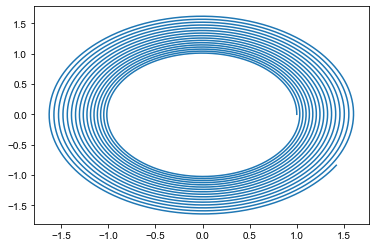

In [117]:
state0 = (1,0)

def f(state):
    
    f = np.zeros_like(state)
    x, y = state
    f[0] = -y
    f[1] = x
    
    return f

t_max = 100
dt = 0.01

u_all,t_all = forward_euler(f, state0, t0, t_max, dt)

fig = plt.figure()

plt.plot(u_all[:,0], u_all[:,1])
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

Text(0.5, 0.5132188731375618, 'Lorenz Attractor')

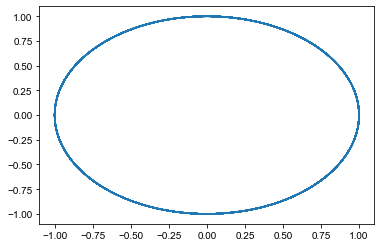

In [118]:
u_all_improved, t_all = improved_euler(f, state0, t0, t_max, dt)

fig = plt.figure()

plt.plot(u_all_improved[:,0], u_all_improved[:,1])
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

## Homework - Planetary motion (the two-body problem or Kepler's problem)  [$\star\star$]


See here for an interesting paper on the use of ODE solvers to model the solar system which is then used to find the location of Neptune: <http://www.diva-portal.org/smash/get/diva2:1218549/FULLTEXT01.pdf>, and establish the chaotic nature of the solar system: <http://science.sciencemag.org/content/257/5066/56/tab-pdf>

See also <https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.30.091201.140243>


Consider the problem of two bodies attracting one another under the force of gravity. Choose one of the bodies as the centre of our frame of reference (think of this body as a star).  Then the motion of the second body (think of a planet or a comet) will be restricted to a two-dimensional plane and it common to denote the coordinate of its position using the notation $\boldsymbol{q}=(q_1,q_2)^T$.

By Newton's second law we can link the acceleration of the second body to the force (per unit mass) experienced on that body due to gravity:

$$\ddot{\boldsymbol{q}} = -\frac{K}{\|\boldsymbol{q}\|^2}\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|}, $$

where $K$ is the product of the star's mass and the gravitational constant. The division by $\|\boldsymbol{q}\|^2$ emphasises that this is an ['inverse square law'](https://en.wikipedia.org/wiki/Inverse-square_law) problem; the ${q}/{\|\boldsymbol{q}\|}$ term is a normalised direction, and the minus sign is due to this being a force of attraction.

With a suitable nondimensionalisation of the problem we can actually just consider the ODE

$$\ddot{\boldsymbol{q}} = -\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|^3}, $$

or written out in full

\begin{align*}
\ddot{q_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\ddot{q_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}

We can turn this into the first-order system

\begin{align*}
\dot{q_1} &= p_1,\\[5pt]
\dot{q_2} &= p_2,\\[5pt]
\dot{p_1} &= -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\\[5pt]
\dot{p_2} &= -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. 
\end{align*}


For an orbit with eccentricity $e \in [0,1)$ we can use initial conditions

\begin{align*}
q_1(0) &= 1 - e, \\[5pt]
q_2(0) &= 0, \\[5pt]
p_1(0) &= 0, \\[5pt]
q_2(0) &= \left(\frac{1 + e}{1 - e}\right)^{1/2}.
\end{align*}

With an eccentricity of zero we revert back to the circular orbit case above. With $e$ closer to 1 we get a more eccentric orbit.

The period of an orbit should be $2\pi$. Simulate this problem for 10 periods using forward and improved Euler and see what orbits you get. Suggest you test the eccentricity values 0.5 and 0.9.

In this problem total energy (kinetic plus potential) should be conserved. Here this is given by

$$H := \frac{1}{2}\|\boldsymbol{p}\|^2 - \frac{1}{\|\boldsymbol{q}\|}.$$

Another conserved quantity is the angular momentum defined as

$$L := q_1p_2 - q_2p_1. $$

Compute and plot these for your solution and see how well this quantity is conserved by our solvers.

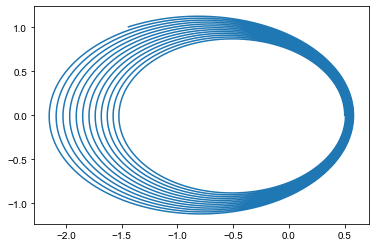

In [143]:
def f(y):
    
    par = -1./(y[0,0]**2+y[0,1]**2)**1.5
    A = np.array([[0,1],[par,0]])
    
    return A @ y

e = 0.5
state = np.array([[1.-e, 0], [0, ((1.+e)/(1.-e))**0.5]])

t0 = 0.
t_mat = 20 * np.pi
dt = 0.001
u_all, t_all = forward_euler(f, state, t0, t_max, dt)

plt.plot(u_all[:,0,0], u_all[:,0,1])


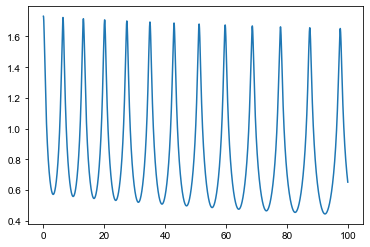

In [145]:
p = np.sqrt((u_all[:,1,1]**2 + u_all[:,1,0]**2))
plt.plot(t_all, p)

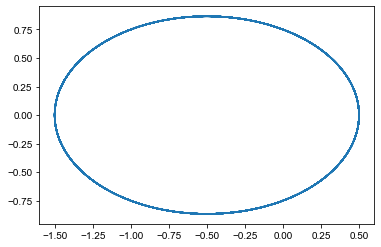

In [146]:
e = 0.5
state = np.array([[1.-e, 0], [0, ((1.+e)/(1.-e))**0.5]])

t0 = 0.
t_mat = 20 * np.pi
dt = 0.001
u_all, t_all = improved_euler(f, state, t0, t_max, dt)

plt.plot(u_all[:,0,0], u_all[:,0,1])

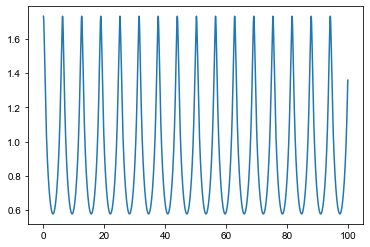

In [147]:
p = np.sqrt((u_all[:,1,1]**2 + u_all[:,1,0]**2))
plt.plot(t_all, p)

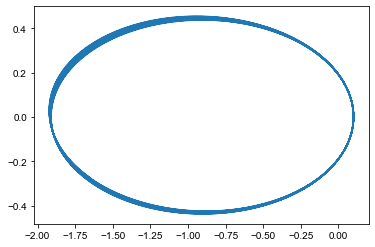

In [148]:
e = 0.9
state = np.array([[1.-e, 0], [0, ((1.+e)/(1.-e))**0.5]])

t0 = 0.
t_mat = 20 * np.pi
dt = 0.001
u_all, t_all = improved_euler(f, state, t0, t_max, dt)

plt.plot(u_all[:,0,0], u_all[:,0,1])

(-0.6, 0.2)

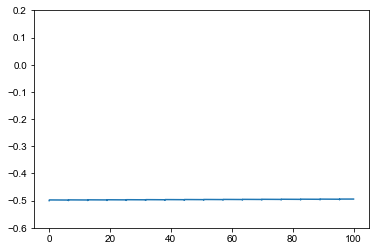

In [153]:
q1, q2, p1, p2 = u_all[:,0,0], u_all[:,0,1], u_all[:,1,0], u_all[:,1,1]
r = np.sqrt(q1**2 + q2**2)
H = 0.5 * (p1**2 + p2**2) - 1./r
L = q1 * p2 - q2 * p1
plt.plot(t_all, H)
plt.ylim(-0.6,0.2)

(0.42, 0.48)

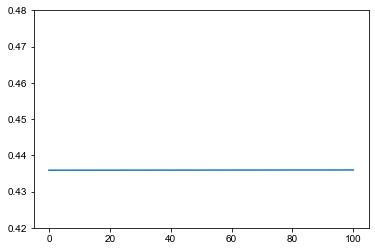

In [154]:
plt.plot(t_all, L)
plt.ylim(0.42,0.48)

## Homework - A ballistics example (the shooting method)  [$\star\star$]

Take a look at

https://www.wired.com/2009/09/how-high-does-a-bullet-go/

Suppose we fire a gun pointing straight up, assuming the bullet hits the ground 60 seconds later, how fast must it have been travelling when it left the gun?

To solve this problem write an ODE solver to solve the problem

$$ \ddot{x} = -g, $$

where $x$ here represents the height of the bullet as a function of time (so $\ddot{x}$ is the bullet's acceleration), and $g$ is acceleration due to gravity. Your first task will be to turn this into a system of first order ODEs.

I suggest you try using the SciPy solver [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) this time, and use it to integrate from time zero to 60s.  We want the bullet to be at a height of zero again at the final time.

We are given the initial location of the bullet ($x(0)=0$), but not its initial velocity ($\dot{x}(0)=$?). 

Starting from upper and lower guesses for the possible initial velocity of the bullet, 
use a bisection algorithm (lecture 4) to iterate towards the solution we desire (i.e. the initial velocity that means the bullet returns to the ground after 60s ($x(60)=0$).

*Hint:* I make the answer 293 m/s.

Note this is an example of a shooting method - rather than two initial conditions (for position and velocity) specified at the initial time, we are given two positions at two different times and our job is to find the missing initial condition (here the initial velocity).

Note that you could extend this problem to add air resistance, and also turn this into a projectile problem where $t$ is replaced as the independent variable by horizontal distance $x$, and our job is to hit a target a certain distance away - what angle should we fire at?  

If you're interested take a look at the MythBusters episode the above Wired article is motivate by.

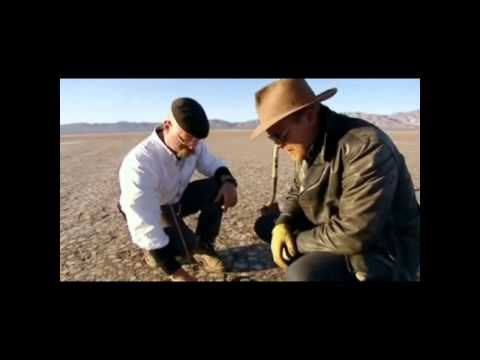

In [155]:
from IPython.display import YouTubeVideo
YouTubeVideo('Vyc1Fu2yTpI')